In [135]:
import pandas as pd
import numpy  as np
import matplotlib.pyplot as plt
%matplotlib inline

import statsmodels.api as sm
import statsmodels.tsa.api as smt

from statsmodels.tsa.stattools import adfuller

from scipy.stats import boxcox
%matplotlib inline


from warnings import filterwarnings 
filterwarnings('ignore')

In [136]:
def test_stationarity(timeseries):
    print('Results of Dickey-Fuller Test:')
    dftest   = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
    for [key, value] in dftest[4].items():
        dfoutput['Critical Value (%s)' % key] = value
    print(dfoutput)

In [137]:
def tsplot(y, lags=None, figsize=(14, 8), style='bmh'):
    test_stationarity(y)
    if not isinstance(y, pd.Series):
        y = pd.Series(y)
    with plt.style.context(style):
        plt.figure(figsize=figsize)
        layout = (4, 1)
        ts_ax = plt.subplot2grid(layout, (0, 0), rowspan=2)
        acf_ax = plt.subplot2grid(layout, (2, 0))
        pacf_ax = plt.subplot2grid(layout, (3, 0))

        y.plot(ax=ts_ax, color='blue', label='Or')
        ts_ax.set_title('Original')

        smt.graphics.plot_acf(y, lags=lags, ax=acf_ax, alpha=0.05)
        smt.graphics.plot_pacf(y, lags=lags, ax=pacf_ax, alpha=0.05)

        plt.tight_layout()
    return

In [138]:
mcs = pd.read_csv("monthly-car-sales-in-quebec-1960.csv").set_index('Month')
mcs.index = pd.DatetimeIndex(mcs.index)
mcs

,Count
Month,
1960-01-01,6550
1960-02-01,8728
1960-03-01,12026
1960-04-01,14395
1960-05-01,14587
...,...
1968-08-01,16722
1968-09-01,14385
1968-10-01,21342


In [139]:
series = boxcox(mcs['Count'],0)
series

array([ 8.78722033,  9.07429153,  9.39482625,  9.5746362 ,  9.587886  ,
        9.53177148,  9.15883653,  9.01808968,  8.86064104,  9.16377274,
        9.14462783,  9.04263153,  8.88696203,  9.14569518,  9.3789855 ,
        9.53126378,  9.67570827,  9.53394445,  9.31856678,  8.98406693,
        8.93721845,  9.21183925,  9.45399218,  9.08432353,  9.27584717,
        9.30082073,  9.62905071,  9.74155669,  9.94750444,  9.69307512,
        9.40450815,  9.10464647,  8.6247912 ,  9.34783889,  9.41377089,
        9.26700422,  9.29302574,  9.30246366,  9.57533065,  9.92226024,
        9.90986716,  9.78785221,  9.41474953,  9.06438932,  8.9824355 ,
        9.54194363,  9.67633598,  9.44367185,  9.41466801,  9.43108104,
        9.84924254,  9.96453561,  9.99947932,  9.82989483,  9.62740462,
        9.24048153,  9.2865604 ,  9.59913395,  9.52908497,  9.37058672,
        9.40763264,  9.4700087 ,  9.90298743, 10.04866956, 10.06649886,
        9.96397099,  9.62832676,  9.60015024,  9.29605925,  9.74

Results of Dickey-Fuller Test:
Test Statistic                 -4.529131
p-value                         0.000174
#Lags Used                      1.000000
Number of Observations Used    94.000000
Critical Value (1%)            -3.501912
Critical Value (5%)            -2.892815
Critical Value (10%)           -2.583454
dtype: float64


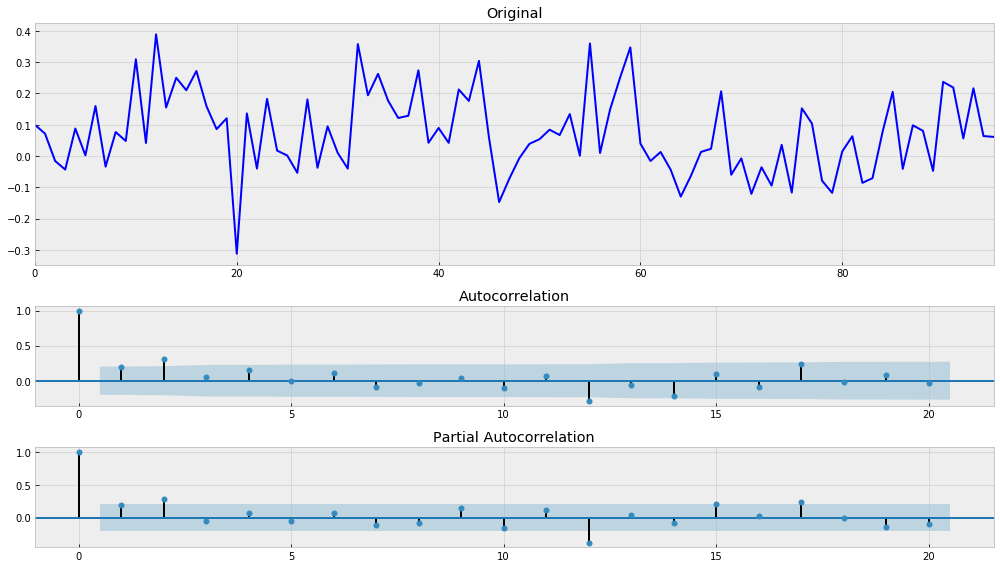

In [140]:
tsplot(series[12:] - series[:-12])

Results of Dickey-Fuller Test:
Test Statistic                -6.535243e+00
p-value                        9.645283e-09
#Lags Used                     0.000000e+00
Number of Observations Used    8.300000e+01
Critical Value (1%)           -3.511712e+00
Critical Value (5%)           -2.897048e+00
Critical Value (10%)          -2.585713e+00
dtype: float64


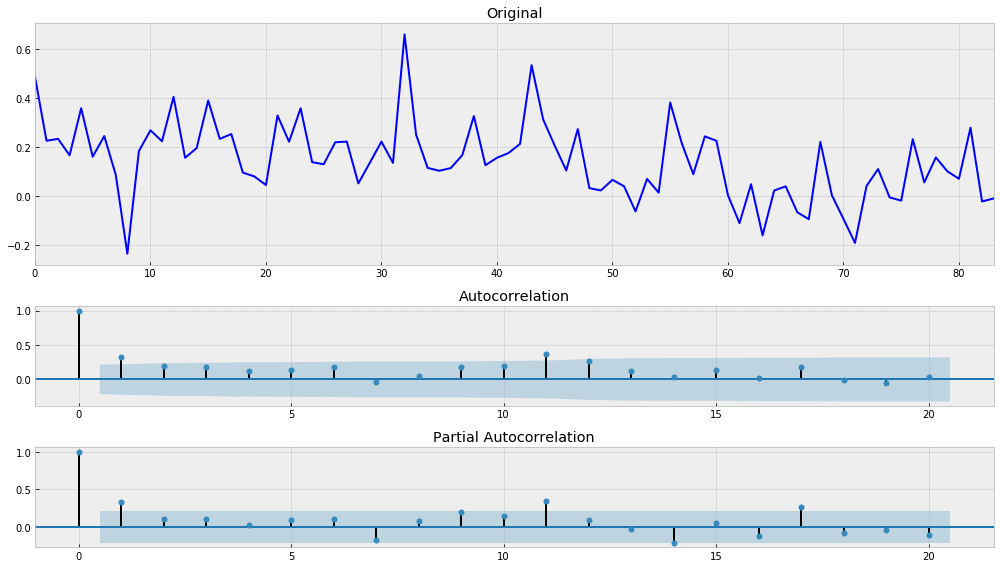

In [141]:
tsplot(series[24:] - series[:-24])

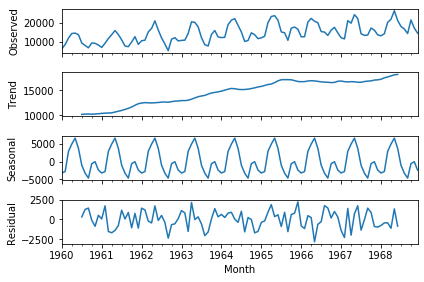

In [142]:
decomp = sm.tsa.seasonal_decompose(mcs.Count)
decomp.plot()
plt.show()

In [143]:
msc = pd.read_csv("monthly-sales-of-company-x-jan-6.csv").set_index('Month')
msc.index = pd.DatetimeIndex(msc.index)
msc.head(1)

,Count
Month,
1965-01-01,154


In [144]:
msc_bc = boxcox(msc['Count'],0)

In [145]:
p_val_min = 999
p_val_ind = 0

for i in range (1,36):
    adftest   = adfuller(msc_bc[i:] - msc_bc[:-i], autolag='AIC')[1]
    if adftest < p_val_min:
        p_val_min = adftest
        p_val_ind = i
        
print('Наименьшее значение p value = ', p_val_min, 'достигается при сдвиге в ', p_val_ind, 'месяцев')       


Наименьшее значение p value =  2.0524821896755008e-13 достигается при сдвиге в  18 месяцев


Results of Dickey-Fuller Test:
Test Statistic                -8.415213e+00
p-value                        2.052482e-13
#Lags Used                     3.000000e+00
Number of Observations Used    5.500000e+01
Critical Value (1%)           -3.555273e+00
Critical Value (5%)           -2.915731e+00
Critical Value (10%)          -2.595670e+00
dtype: float64


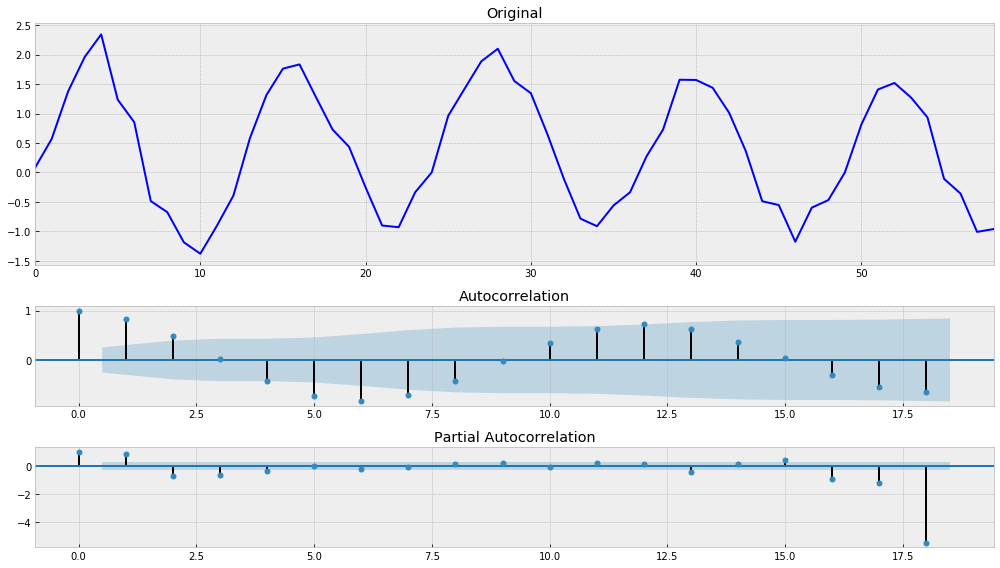

In [146]:
tsplot(msc_bc[18:] - msc_bc[:-18])

In [147]:
msc_bc_2 = boxcox(msc['Count'])

In [148]:
p_val_min = 999
p_val_ind = 0
p_val_lmb = 0

for i in range (1,36):
    adftest   = adfuller(msc_bc_2[0][i:] - msc_bc_2[0][:-i], autolag='AIC')[1]
    if adftest < p_val_min:
        p_val_min = adftest
        p_val_ind = i
        p_val_lmb = msc_bc_2[1]
        
print('Наименьшее значение p value = ', p_val_min, 
      'достигается при лямбде = ', round (p_val_lmb, 2), 
      'и сдвиге в ', p_val_ind, 'месяцев')  

Наименьшее значение p value =  1.3236562587690044e-15 достигается при лямбде =  0.21 и сдвиге в  20 месяцев


Results of Dickey-Fuller Test:
Test Statistic                -9.271421e+00
p-value                        1.323656e-15
#Lags Used                     3.000000e+00
Number of Observations Used    5.300000e+01
Critical Value (1%)           -3.560242e+00
Critical Value (5%)           -2.917850e+00
Critical Value (10%)          -2.596796e+00
dtype: float64


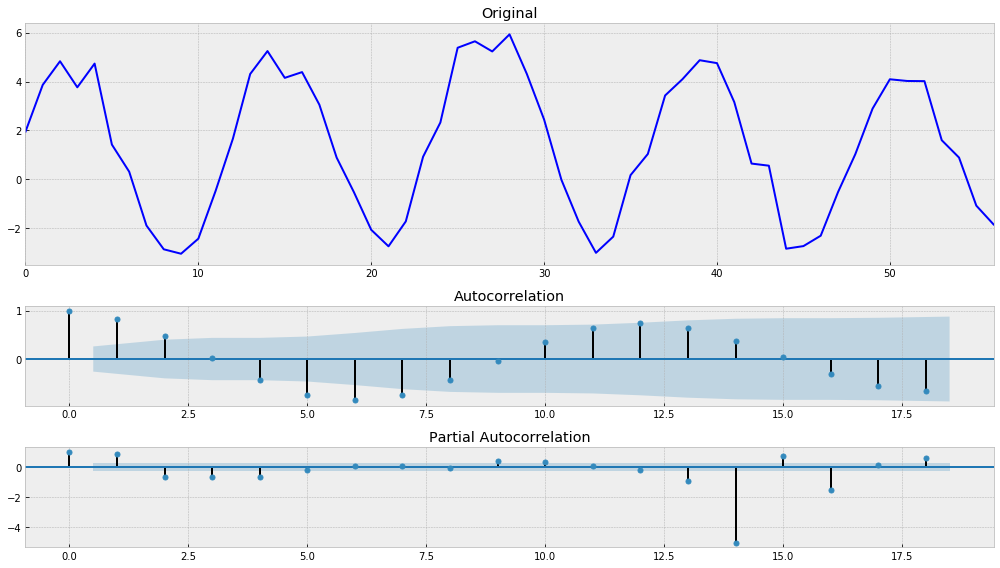

In [154]:
tsplot(msc_bc_2[0][20:] - msc_bc_2[0][:-20])